In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from IPython.core.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

In [4]:
path2019= 'c:/Users/soohan/bigcontest/dataset/NAVER_GS_DATA_ver1.0/2019_datalab_gs'
path2020= 'c:/Users/soohan/bigcontest/dataset/NAVER_GS_DATA_ver1.0/2020_datalab_gs'

In [5]:
# 첫번째 업종
gs2019_1d= pd.read_excel(path2019+'1_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_1d= pd.read_excel(path2020+'1_d.xlsx',names= ['DATE','RATIO'], header=None)

# 두번째 업종
gs2019_2d= pd.read_excel(path2019+'2_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_2d= pd.read_excel(path2020+'2_d.xlsx',names= ['DATE','RATIO'], header=None)

# 세번째 업종
gs2019_3d= pd.read_excel(path2019+'3_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_3d= pd.read_excel(path2020+'3_d.xlsx',names= ['DATE','RATIO'], header=None)

# 네번째 업종
gs2019_4d= pd.read_excel(path2019+'4_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_4d= pd.read_excel(path2020+'4_d.xlsx',names= ['DATE','RATIO'], header=None)

# 다섯번째 업종
gs2019_5d= pd.read_excel(path2019+'5_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_5d= pd.read_excel(path2020+'5_d.xlsx',names= ['DATE','RATIO'], header=None)

# 여섯번째 업종
gs2019_6d= pd.read_excel(path2019+'6_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_6d= pd.read_excel(path2020+'6_d.xlsx',names= ['DATE','RATIO'], header=None)

# 일곱번째 업종
gs2019_7d= pd.read_excel(path2019+'7_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_7d= pd.read_excel(path2020+'7_d.xlsx',names= ['DATE','RATIO'], header=None)

# 여덟번째 업종
gs2019_8d= pd.read_excel(path2019+'8_d.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_8d= pd.read_excel(path2020+'8_d.xlsx',names= ['DATE','RATIO'], header=None)

In [6]:
# gs total data 불러오기
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)

gs_total_data= gs['GS_TOTAL']

In [7]:
# DATE별로 묶고 업종별로 정리하기
gs_total_gb1d= gs_total_data.groupby('DATE').sum()['LCLS_10_P'].reset_index()
gs_total_gb2d= gs_total_data.groupby('DATE').sum()['LCLS_20_P'].reset_index()
gs_total_gb3d= gs_total_data.groupby('DATE').sum()['LCLS_30_P'].reset_index()
gs_total_gb4d= gs_total_data.groupby('DATE').sum()['LCLS_40_P'].reset_index()
gs_total_gb5d= gs_total_data.groupby('DATE').sum()['LCLS_50_P'].reset_index()
gs_total_gb6d= gs_total_data.groupby('DATE').sum()['LCLS_60_P'].reset_index()
gs_total_gb7d= gs_total_data.groupby('DATE').sum()['LCLS_70_P'].reset_index()
gs_total_gb8d= gs_total_data.groupby('DATE').sum()['LCLS_80_P'].reset_index()

In [9]:
# 네이버 일별 두 데이터 합치기(일별)
gstotal_1d= pd.concat([gs2019_1d,gs2020_1d])
gstotal_2d= pd.concat([gs2019_2d,gs2020_2d])
gstotal_3d= pd.concat([gs2019_3d,gs2020_3d])
gstotal_4d= pd.concat([gs2019_4d,gs2020_4d])
gstotal_5d= pd.concat([gs2019_5d,gs2020_5d])
gstotal_6d= pd.concat([gs2019_6d,gs2020_6d])
gstotal_7d= pd.concat([gs2019_7d,gs2020_7d])
gstotal_8d= pd.concat([gs2019_8d,gs2020_8d])

In [10]:
# datetime 형태로 변환하기
gstotal_1d.DATE= gstotal_1d.DATE.astype('datetime64')
gstotal_2d.DATE= gstotal_2d.DATE.astype('datetime64')
gstotal_3d.DATE= gstotal_3d.DATE.astype('datetime64')
gstotal_4d.DATE= gstotal_4d.DATE.astype('datetime64')
gstotal_5d.DATE= gstotal_5d.DATE.astype('datetime64')
gstotal_6d.DATE= gstotal_6d.DATE.astype('datetime64')
gstotal_7d.DATE= gstotal_7d.DATE.astype('datetime64')
gstotal_8d.DATE= gstotal_8d.DATE.astype('datetime64')

In [14]:
# GS데이터와 Naver데이터 합치기
gsmerge_1d= pd.merge(gs_total_gb1d,gstotal_1d, on= 'DATE')
gsmerge_2d= pd.merge(gs_total_gb2d,gstotal_2d, on= 'DATE')
gsmerge_3d= pd.merge(gs_total_gb3d,gstotal_3d, on= 'DATE')
gsmerge_4d= pd.merge(gs_total_gb4d,gstotal_4d, on= 'DATE')
gsmerge_5d= pd.merge(gs_total_gb5d,gstotal_5d, on= 'DATE')
gsmerge_6d= pd.merge(gs_total_gb6d,gstotal_6d, on= 'DATE')
gsmerge_7d= pd.merge(gs_total_gb7d,gstotal_7d, on= 'DATE')
gsmerge_8d= pd.merge(gs_total_gb8d,gstotal_8d, on= 'DATE')

In [22]:
# MinMax Scaling
scaler= MinMaxScaler()
gsmerge_1d_scaled= gsmerge_1d.copy()
gsmerge_1d_scaled.RATIO= gsmerge_1d.RATIO.apply(lambda x: (x-gsmerge_1d.RATIO.min(axis=0))/(gsmerge_1d.RATIO.max(axis=0)-gsmerge_1d.RATIO.min(axis=0)))
gsmerge_1d_scaled.LCLS_10_P= gsmerge_1d.LCLS_10_P.apply(lambda x: (x-gsmerge_1d.LCLS_10_P.min(axis=0))/(gsmerge_1d.LCLS_10_P.max(axis=0)-gsmerge_1d.LCLS_10_P.min(axis=0)))

gsmerge_2d_scaled= gsmerge_2d.copy()
gsmerge_2d_scaled.RATIO= gsmerge_2d.RATIO.apply(lambda x: (x-gsmerge_2d.RATIO.min(axis=0))/(gsmerge_2d.RATIO.max(axis=0)-gsmerge_2d.RATIO.min(axis=0)))
gsmerge_2d_scaled.LCLS_20_P= gsmerge_2d.LCLS_20_P.apply(lambda x: (x-gsmerge_2d.LCLS_20_P.min(axis=0))/(gsmerge_2d.LCLS_20_P.max(axis=0)-gsmerge_2d.LCLS_20_P.min(axis=0)))

gsmerge_3d_scaled= gsmerge_3d.copy()
gsmerge_3d_scaled.RATIO= gsmerge_3d.RATIO.apply(lambda x: (x-gsmerge_3d.RATIO.min(axis=0))/(gsmerge_3d.RATIO.max(axis=0)-gsmerge_3d.RATIO.min(axis=0)))
gsmerge_3d_scaled.LCLS_30_P= gsmerge_3d.LCLS_30_P.apply(lambda x: (x-gsmerge_3d.LCLS_30_P.min(axis=0))/(gsmerge_3d.LCLS_30_P.max(axis=0)-gsmerge_3d.LCLS_30_P.min(axis=0)))

gsmerge_4d_scaled= gsmerge_4d.copy()
gsmerge_4d_scaled.RATIO= gsmerge_4d.RATIO.apply(lambda x: (x-gsmerge_4d.RATIO.min(axis=0))/(gsmerge_4d.RATIO.max(axis=0)-gsmerge_4d.RATIO.min(axis=0)))
gsmerge_4d_scaled.LCLS_40_P= gsmerge_4d.LCLS_40_P.apply(lambda x: (x-gsmerge_4d.LCLS_40_P.min(axis=0))/(gsmerge_4d.LCLS_40_P.max(axis=0)-gsmerge_4d.LCLS_40_P.min(axis=0)))

gsmerge_5d_scaled= gsmerge_5d.copy()
gsmerge_5d_scaled.RATIO= gsmerge_5d.RATIO.apply(lambda x: (x-gsmerge_5d.RATIO.min(axis=0))/(gsmerge_5d.RATIO.max(axis=0)-gsmerge_5d.RATIO.min(axis=0)))
gsmerge_5d_scaled.LCLS_50_P= gsmerge_5d.LCLS_50_P.apply(lambda x: (x-gsmerge_5d.LCLS_50_P.min(axis=0))/(gsmerge_5d.LCLS_50_P.max(axis=0)-gsmerge_5d.LCLS_50_P.min(axis=0)))

gsmerge_6d_scaled= gsmerge_6d.copy()
gsmerge_6d_scaled.RATIO= gsmerge_6d.RATIO.apply(lambda x: (x-gsmerge_6d.RATIO.min(axis=0))/(gsmerge_6d.RATIO.max(axis=0)-gsmerge_6d.RATIO.min(axis=0)))
gsmerge_6d_scaled.LCLS_60_P= gsmerge_6d.LCLS_60_P.apply(lambda x: (x-gsmerge_6d.LCLS_60_P.min(axis=0))/(gsmerge_6d.LCLS_60_P.max(axis=0)-gsmerge_6d.LCLS_60_P.min(axis=0)))

gsmerge_7d_scaled= gsmerge_7d.copy()
gsmerge_7d_scaled.RATIO= gsmerge_7d.RATIO.apply(lambda x: (x-gsmerge_7d.RATIO.min(axis=0))/(gsmerge_7d.RATIO.max(axis=0)-gsmerge_7d.RATIO.min(axis=0)))
gsmerge_7d_scaled.LCLS_70_P= gsmerge_7d.LCLS_70_P.apply(lambda x: (x-gsmerge_7d.LCLS_70_P.min(axis=0))/(gsmerge_7d.LCLS_70_P.max(axis=0)-gsmerge_7d.LCLS_70_P.min(axis=0)))

gsmerge_8d_scaled= gsmerge_8d.copy()
gsmerge_8d_scaled.RATIO= gsmerge_8d.RATIO.apply(lambda x: (x-gsmerge_8d.RATIO.min(axis=0))/(gsmerge_8d.RATIO.max(axis=0)-gsmerge_8d.RATIO.min(axis=0)))
gsmerge_8d_scaled.LCLS_80_P= gsmerge_8d.LCLS_80_P.apply(lambda x: (x-gsmerge_8d.LCLS_80_P.min(axis=0))/(gsmerge_8d.LCLS_80_P.max(axis=0)-gsmerge_8d.LCLS_80_P.min(axis=0)))

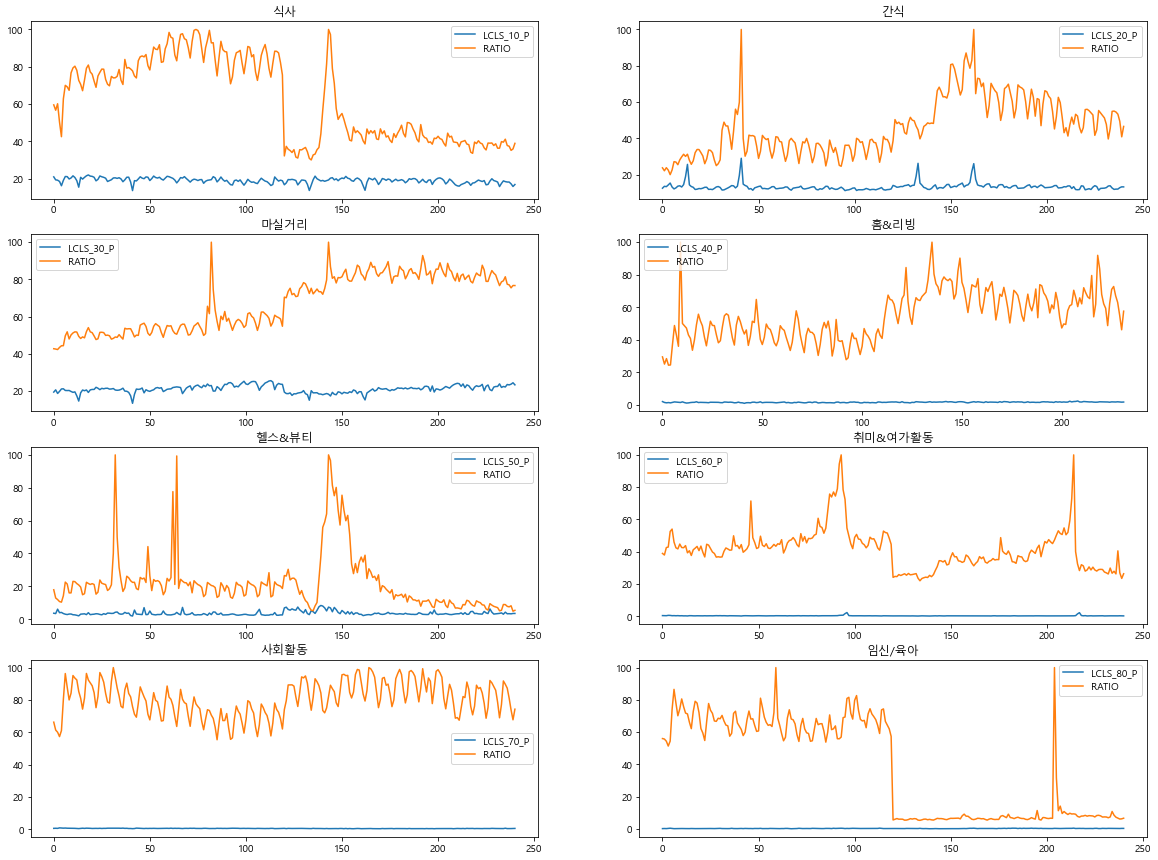

In [19]:
# 단순 수치 그래프로 비교하기
fig, axs= plt.subplots(nrows= 4, ncols=2, figsize= (20,15))
axs[0,0].plot(gsmerge_1d.iloc[:,1:])
axs[0,0].set_title('식사')
axs[0,0].legend(gsmerge_1d.iloc[:,1:].columns)
axs[0,1].plot(gsmerge_2d.iloc[:,1:])
axs[0,1].set_title('간식')
axs[0,1].legend(gsmerge_2d.iloc[:,1:].columns)
axs[1,0].plot(gsmerge_3d.iloc[:,1:])
axs[1,0].set_title('마실거리')
axs[1,0].legend(gsmerge_3d.iloc[:,1:].columns)
axs[1,1].plot(gsmerge_4d.iloc[:,1:])
axs[1,1].set_title('홈&리빙')
axs[1,1].legend(gsmerge_4d.iloc[:,1:].columns)
axs[2,0].plot(gsmerge_5d.iloc[:,1:])
axs[2,0].set_title('헬스&뷰티')
axs[2,0].legend(gsmerge_5d.iloc[:,1:].columns)
axs[2,1].plot(gsmerge_6d.iloc[:,1:])
axs[2,1].set_title('취미&여가활동')
axs[2,1].legend(gsmerge_6d.iloc[:,1:].columns)
axs[3,0].plot(gsmerge_7d.iloc[:,1:])
axs[3,0].set_title('사회활동')
axs[3,0].legend(gsmerge_7d.iloc[:,1:].columns)
axs[3,1].plot(gsmerge_8d.iloc[:,1:])
axs[3,1].set_title('임신/육아')
axs[3,1].legend(gsmerge_8d.iloc[:,1:].columns)
plt.show()

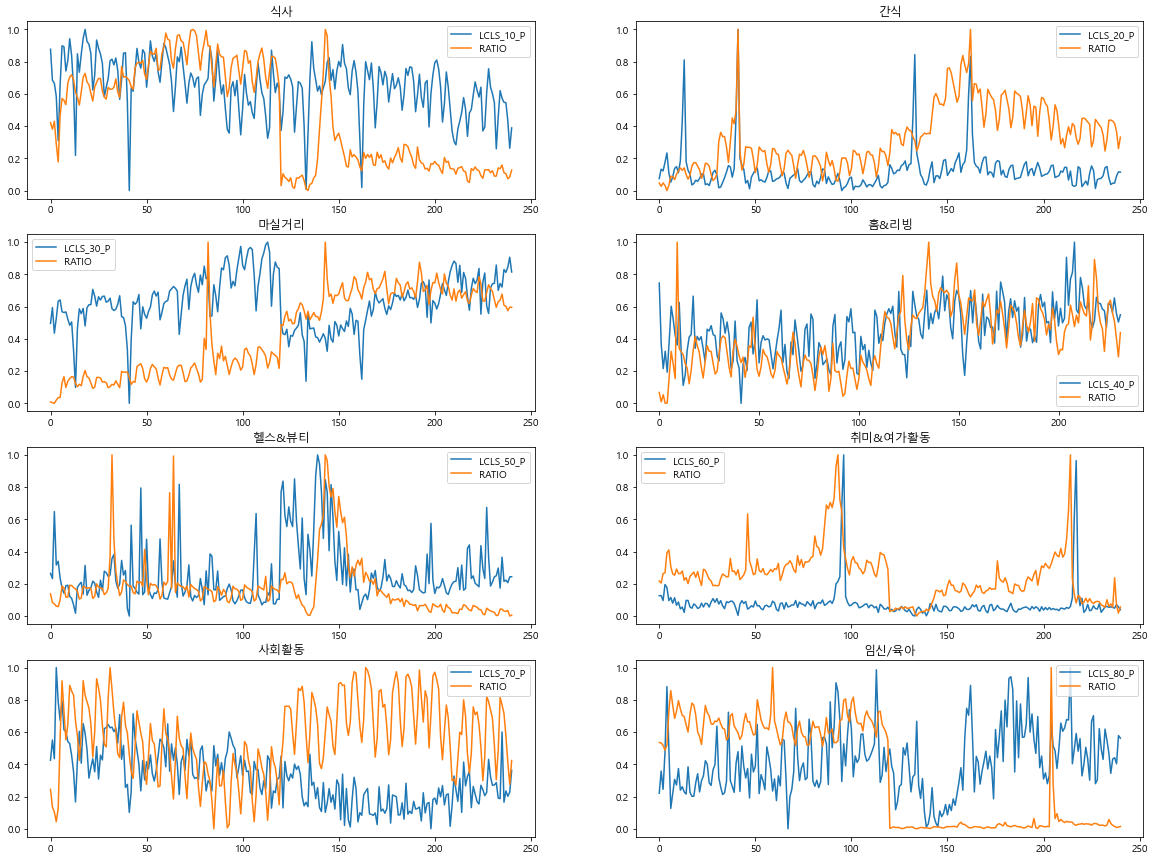

In [23]:
# 단순 수치 그래프로 비교하기(scaled)
fig, axs= plt.subplots(nrows= 4, ncols=2, figsize= (20,15))
axs[0,0].plot(gsmerge_1d_scaled.iloc[:,1:])
axs[0,0].set_title('식사')
axs[0,0].legend(gsmerge_1d_scaled.iloc[:,1:].columns)
axs[0,1].plot(gsmerge_2d_scaled.iloc[:,1:])
axs[0,1].set_title('간식')
axs[0,1].legend(gsmerge_2d_scaled.iloc[:,1:].columns)
axs[1,0].plot(gsmerge_3d_scaled.iloc[:,1:])
axs[1,0].set_title('마실거리')
axs[1,0].legend(gsmerge_3d_scaled.iloc[:,1:].columns)
axs[1,1].plot(gsmerge_4d_scaled.iloc[:,1:])
axs[1,1].set_title('홈&리빙')
axs[1,1].legend(gsmerge_4d_scaled.iloc[:,1:].columns)
axs[2,0].plot(gsmerge_5d_scaled.iloc[:,1:])
axs[2,0].set_title('헬스&뷰티')
axs[2,0].legend(gsmerge_5d_scaled.iloc[:,1:].columns)
axs[2,1].plot(gsmerge_6d_scaled.iloc[:,1:])
axs[2,1].set_title('취미&여가활동')
axs[2,1].legend(gsmerge_6d_scaled.iloc[:,1:].columns)
axs[3,0].plot(gsmerge_7d_scaled.iloc[:,1:])
axs[3,0].set_title('사회활동')
axs[3,0].legend(gsmerge_7d_scaled.iloc[:,1:].columns)
axs[3,1].plot(gsmerge_8d_scaled.iloc[:,1:])
axs[3,1].set_title('임신/육아')
axs[3,1].legend(gsmerge_8d_scaled.iloc[:,1:].columns)
plt.show()

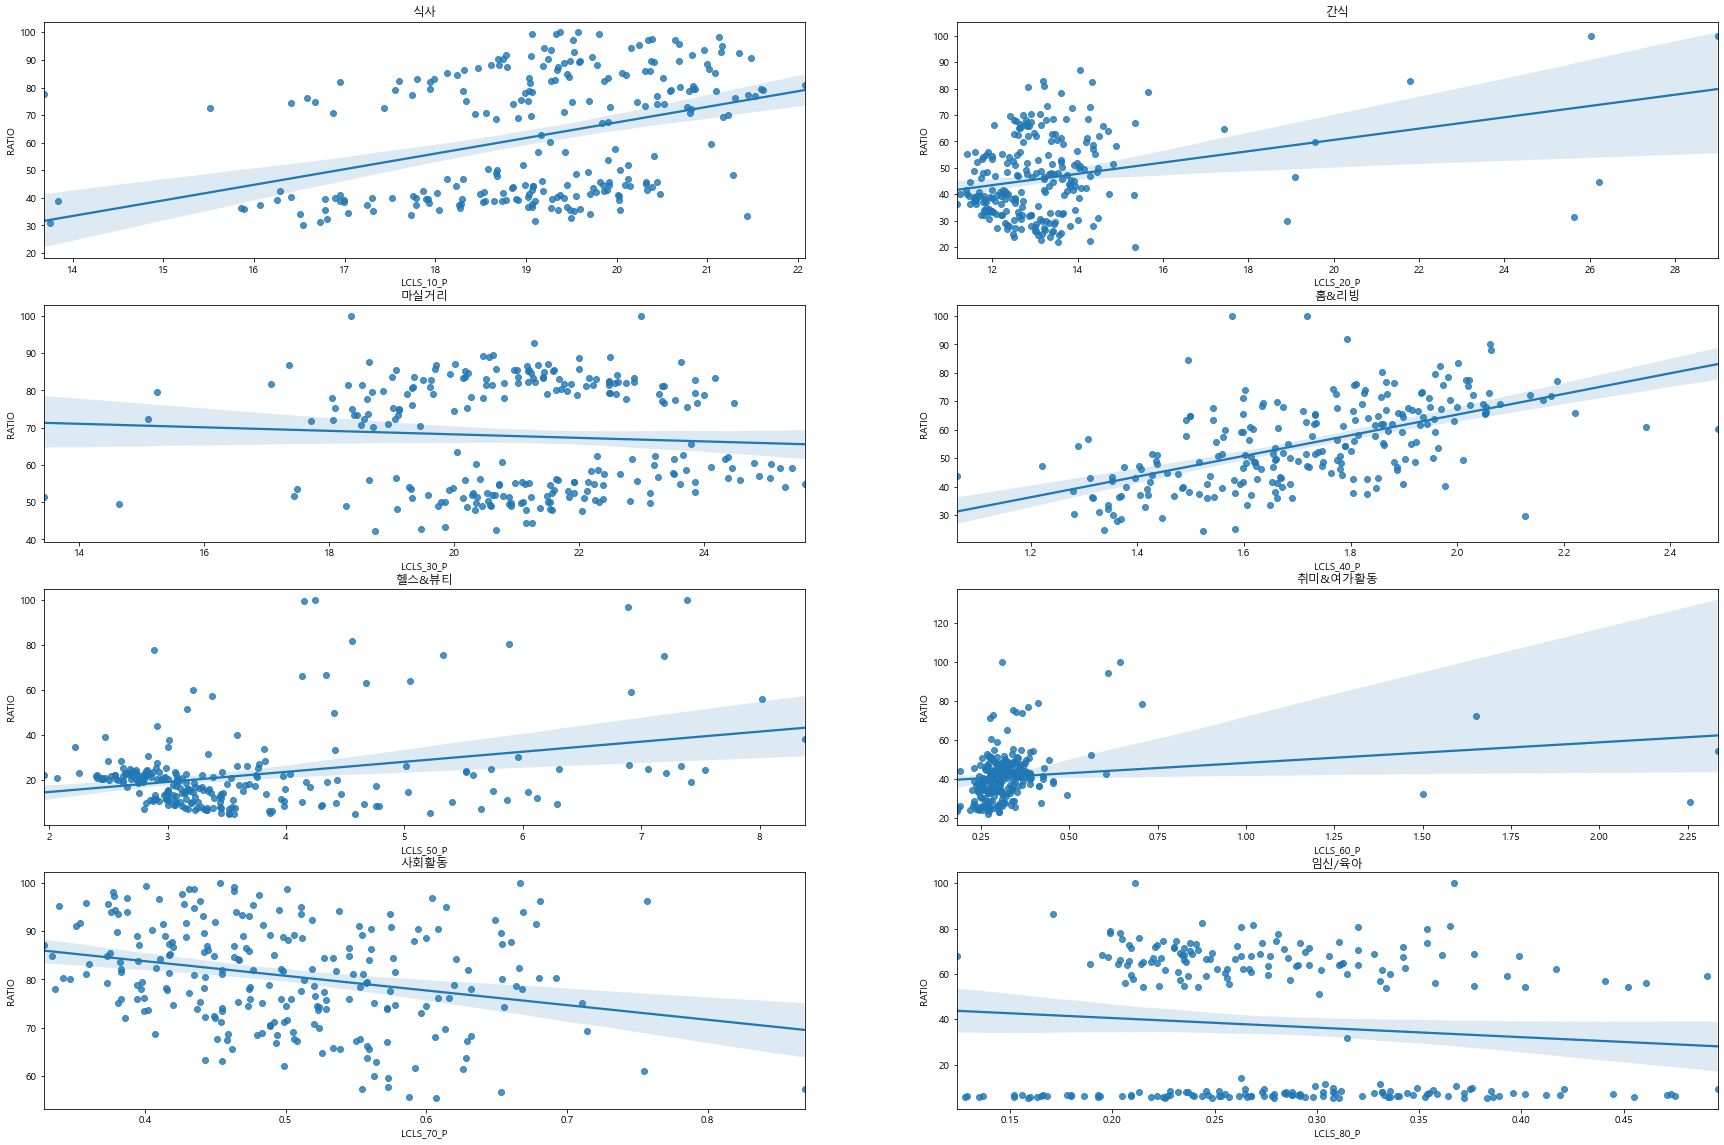

In [24]:
# regression 그래프로 비교하기
fig, axes= plt.subplots(nrows=4, ncols=2, squeeze= False)
fig.set_size_inches(30,20)

sns.regplot(x= "LCLS_10_P",y="RATIO", data= gsmerge_1d, ax=axes[0][0])
sns.regplot(x= "LCLS_20_P",y="RATIO", data= gsmerge_2d, ax=axes[0][1])
sns.regplot(x= "LCLS_30_P",y="RATIO", data= gsmerge_3d, ax=axes[1][0])
sns.regplot(x= "LCLS_40_P",y="RATIO", data= gsmerge_4d, ax=axes[1][1])
sns.regplot(x= "LCLS_50_P",y="RATIO", data= gsmerge_5d, ax=axes[2][0])
sns.regplot(x= "LCLS_60_P",y="RATIO", data= gsmerge_6d, ax=axes[2][1])
sns.regplot(x= "LCLS_70_P",y="RATIO", data= gsmerge_7d, ax=axes[3][0])
sns.regplot(x= "LCLS_80_P",y="RATIO", data= gsmerge_8d, ax=axes[3][1])

axes[0][0].set(title= "식사")
axes[0][1].set(title= "간식")
axes[1][0].set(title= "마실거리")
axes[1][1].set(title= "홈&리빙")
axes[2][0].set(title= "헬스&뷰티")
axes[2][1].set(title= "취미&여가활동")
axes[3][0].set(title= "사회활동")
axes[3][1].set(title= "임신/육아")

plt.show()

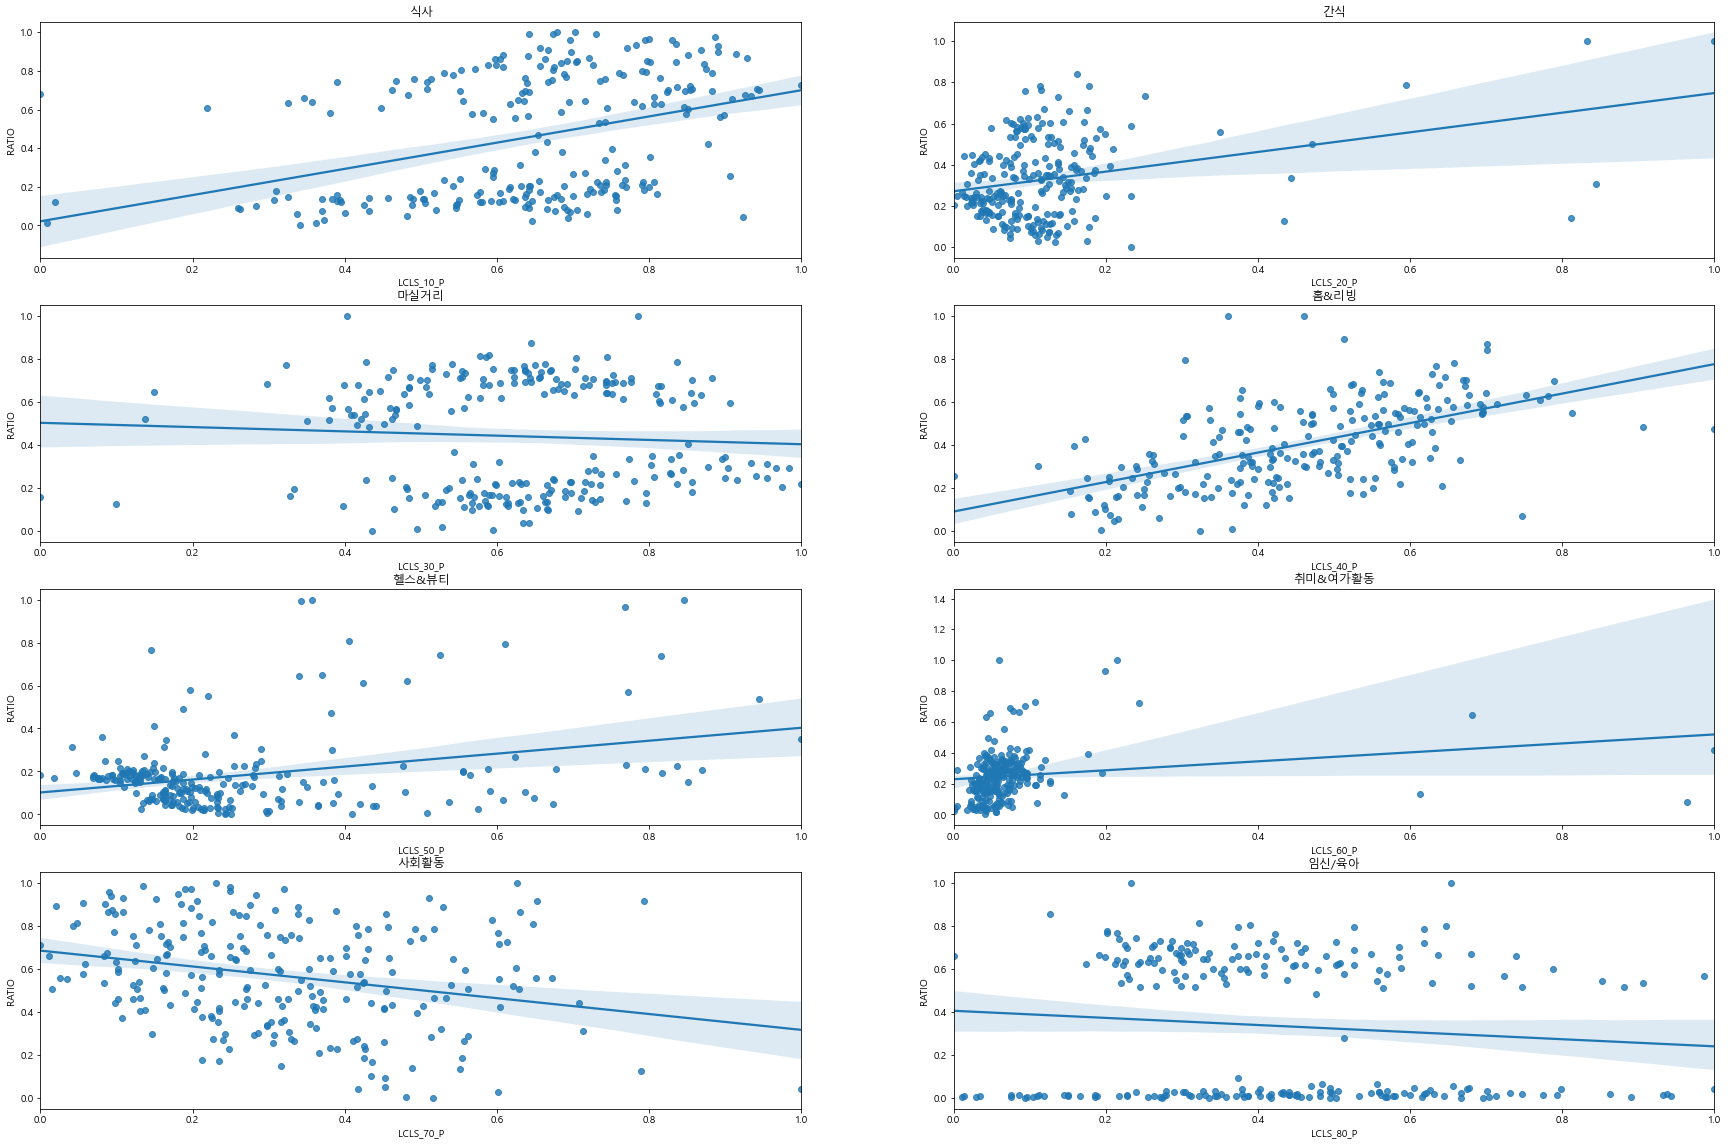

In [25]:
# regression 그래프로 비교하기 (scaled)
fig, axes= plt.subplots(nrows=4, ncols=2, squeeze= False)
fig.set_size_inches(30,20)

sns.regplot(x= "LCLS_10_P",y="RATIO", data= gsmerge_1d_scaled, ax=axes[0][0])
sns.regplot(x= "LCLS_20_P",y="RATIO", data= gsmerge_2d_scaled, ax=axes[0][1])
sns.regplot(x= "LCLS_30_P",y="RATIO", data= gsmerge_3d_scaled, ax=axes[1][0])
sns.regplot(x= "LCLS_40_P",y="RATIO", data= gsmerge_4d_scaled, ax=axes[1][1])
sns.regplot(x= "LCLS_50_P",y="RATIO", data= gsmerge_5d_scaled, ax=axes[2][0])
sns.regplot(x= "LCLS_60_P",y="RATIO", data= gsmerge_6d_scaled, ax=axes[2][1])
sns.regplot(x= "LCLS_70_P",y="RATIO", data= gsmerge_7d_scaled, ax=axes[3][0])
sns.regplot(x= "LCLS_80_P",y="RATIO", data= gsmerge_8d_scaled, ax=axes[3][1])

axes[0][0].set(title= "식사")
axes[0][1].set(title= "간식")
axes[1][0].set(title= "마실거리")
axes[1][1].set(title= "홈&리빙")
axes[2][0].set(title= "헬스&뷰티")
axes[2][1].set(title= "취미&여가활동")
axes[3][0].set(title= "사회활동")
axes[3][1].set(title= "임신/육아")

plt.show()

In [40]:
# 업종별 비율과 검색어 비율과의 관계
lm= LinearRegression()
lm.fit(np.array(gsmerge_1d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_1d.iloc[:,2]).reshape(-1,1))
predY_1= lm.predict(np.array(gsmerge_1d.iloc[:,1]).reshape(-1,1))
print("식사 업종의 Rsquare:",r2_score(np.array(gsmerge_1d.iloc[:,2]).reshape(-1,1), predY_1))

lm2= LinearRegression()
lm2.fit(np.array(gsmerge_2d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2d.iloc[:,2]).reshape(-1,1))
predY_2= lm2.predict(np.array(gsmerge_2d.iloc[:,1]).reshape(-1,1))
print("간식 업종의 Rsquare:",r2_score(np.array(gsmerge_2d.iloc[:,2]).reshape(-1,1), predY_2))

lm3= LinearRegression()
lm3.fit(np.array(gsmerge_3d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_3d.iloc[:,2]).reshape(-1,1))
predY_3= lm3.predict(np.array(gsmerge_3d.iloc[:,1]).reshape(-1,1))
print("마실거리 업종의 Rsquare:",r2_score(np.array(gsmerge_3d.iloc[:,2]).reshape(-1,1), predY_3))

lm4= LinearRegression()
lm4.fit(np.array(gsmerge_4d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_4d.iloc[:,2]).reshape(-1,1))
predY_4= lm4.predict(np.array(gsmerge_4d.iloc[:,1]).reshape(-1,1))
print("홈&리빙 업종의 Rsquare:",r2_score(np.array(gsmerge_4d.iloc[:,2]).reshape(-1,1), predY_4))

lm5= LinearRegression()
lm5.fit(np.array(gsmerge_5d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_5d.iloc[:,2]).reshape(-1,1))
predY_5= lm5.predict(np.array(gsmerge_5d.iloc[:,1]).reshape(-1,1))
print("헬스&뷰티 업종의 Rsquare:",r2_score(np.array(gsmerge_5d.iloc[:,2]).reshape(-1,1), predY_5))

lm6= LinearRegression()
lm6.fit(np.array(gsmerge_6d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_6d.iloc[:,2]).reshape(-1,1))
predY_6= lm6.predict(np.array(gsmerge_6d.iloc[:,1]).reshape(-1,1))
print("취미&여가활동 업종의 Rsquare:",r2_score(np.array(gsmerge_6d.iloc[:,2]).reshape(-1,1), predY_6))

lm7= LinearRegression()
lm7.fit(np.array(gsmerge_7d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_7d.iloc[:,2]).reshape(-1,1))
predY_7= lm7.predict(np.array(gsmerge_7d.iloc[:,1]).reshape(-1,1))
print("사회활동 업종의 Rsquare:",r2_score(np.array(gsmerge_7d.iloc[:,2]).reshape(-1,1), predY_7))

lm8= LinearRegression()
lm8.fit(np.array(gsmerge_8d.iloc[:,1]).reshape(-1,1), np.array(gsmerge_8d.iloc[:,2]).reshape(-1,1))
predY_8= lm8.predict(np.array(gsmerge_8d.iloc[:,1]).reshape(-1,1))
print("임신/육아 업종의 Rsquare:",r2_score(np.array(gsmerge_8d.iloc[:,2]).reshape(-1,1), predY_8))

식사 업종의 Rsquare: 0.1367666584829451
간식 업종의 Rsquare: 0.09081945612105746
마실거리 업종의 Rsquare: 0.0040666340674703205
홈&리빙 업종의 Rsquare: 0.32274855906159816
헬스&뷰티 업종의 Rsquare: 0.099275378854225
취미&여가활동 업종의 Rsquare: 0.03514833277263474
사회활동 업종의 Rsquare: 0.07234671043834207
임신/육아 업종의 Rsquare: 0.010580721100124646


In [45]:
# 업종별 비율과 검색어 비율과의 관계(scaled)
lm_scaled= LinearRegression()
lm_scaled.fit(np.array(gsmerge_1d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_1d_scaled.iloc[:,2]).reshape(-1,1))
predY_1_scaled= lm_scaled.predict(np.array(gsmerge_1d_scaled.iloc[:,1]).reshape(-1,1))
print("식사 업종의 Rsquare:",r2_score(np.array(gsmerge_1d_scaled.iloc[:,2]).reshape(-1,1), predY_1_scaled))

lm2_scaled= LinearRegression()
lm2_scaled.fit(np.array(gsmerge_2d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2d_scaled.iloc[:,2]).reshape(-1,1))
predY_2_scaled= lm2_scaled.predict(np.array(gsmerge_2d_scaled.iloc[:,1]).reshape(-1,1))
print("간식 업종의 Rsquare:",r2_score(np.array(gsmerge_2d_scaled.iloc[:,2]).reshape(-1,1), predY_2_scaled))

lm3_scaled= LinearRegression()
lm3_scaled.fit(np.array(gsmerge_3d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_3d_scaled.iloc[:,2]).reshape(-1,1))
predY_3_scaled= lm3_scaled.predict(np.array(gsmerge_3d_scaled.iloc[:,1]).reshape(-1,1))
print("마실거리 업종의 Rsquare:",r2_score(np.array(gsmerge_3d_scaled.iloc[:,2]).reshape(-1,1), predY_3_scaled))

lm4_scaled= LinearRegression()
lm4_scaled.fit(np.array(gsmerge_4d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_4d_scaled.iloc[:,2]).reshape(-1,1))
predY_4_scaled= lm4_scaled.predict(np.array(gsmerge_4d_scaled.iloc[:,1]).reshape(-1,1))
print("홈&리빙 업종의 Rsquare:",r2_score(np.array(gsmerge_4d_scaled.iloc[:,2]).reshape(-1,1), predY_4_scaled))

lm5_scaled= LinearRegression()
lm5_scaled.fit(np.array(gsmerge_5d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_5d_scaled.iloc[:,2]).reshape(-1,1))
predY_5_scaled= lm5_scaled.predict(np.array(gsmerge_5d_scaled.iloc[:,1]).reshape(-1,1))
print("헬스&뷰티 업종의 Rsquare:",r2_score(np.array(gsmerge_5d_scaled.iloc[:,2]).reshape(-1,1), predY_5_scaled))

lm6_scaled= LinearRegression()
lm6_scaled.fit(np.array(gsmerge_6d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_6d_scaled.iloc[:,2]).reshape(-1,1))
predY_6_scaled= lm6_scaled.predict(np.array(gsmerge_6d_scaled.iloc[:,1]).reshape(-1,1))
print("취미&여가활동 업종의 Rsquare:",r2_score(np.array(gsmerge_6d_scaled.iloc[:,2]).reshape(-1,1), predY_6_scaled))

lm7_scaled= LinearRegression()
lm7_scaled.fit(np.array(gsmerge_7d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_7d_scaled.iloc[:,2]).reshape(-1,1))
predY_7_scaled= lm7_scaled.predict(np.array(gsmerge_7d_scaled.iloc[:,1]).reshape(-1,1))
print("사회활동 업종의 Rsquare:",r2_score(np.array(gsmerge_7d_scaled.iloc[:,2]).reshape(-1,1), predY_7_scaled))

lm8_scaled= LinearRegression()
lm8_scaled.fit(np.array(gsmerge_8d_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_8d_scaled.iloc[:,2]).reshape(-1,1))
predY_8_scaled= lm8_scaled.predict(np.array(gsmerge_8d_scaled.iloc[:,1]).reshape(-1,1))
print("임신/육아 업종의 Rsquare:",r2_score(np.array(gsmerge_8d_scaled.iloc[:,2]).reshape(-1,1), predY_8_scaled))

식사 업종의 Rsquare: 0.13676667508503715
간식 업종의 Rsquare: 0.09081946777663619
마실거리 업종의 Rsquare: 0.004066620811002508
홈&리빙 업종의 Rsquare: 0.32274852756875516
헬스&뷰티 업종의 Rsquare: 0.09927538437442662
취미&여가활동 업종의 Rsquare: 0.035148331641017494
사회활동 업종의 Rsquare: 0.0723467062343186
임신/육아 업종의 Rsquare: 0.010580729750463203


# log 취해서 회귀분석 해보기

In [46]:
# log Scaling
gsmerge_1d_log_scaled= gsmerge_1d.copy()
gsmerge_1d_log_scaled.RATIO= np.log(gsmerge_1d.RATIO)

gsmerge_2d_log_scaled= gsmerge_2d.copy()
gsmerge_2d_log_scaled.RATIO= np.log(gsmerge_2d.RATIO)

gsmerge_3d_log_scaled= gsmerge_3d.copy()
gsmerge_3d_log_scaled.RATIO= np.log(gsmerge_3d.RATIO)

gsmerge_4d_log_scaled= gsmerge_4d.copy()
gsmerge_4d_log_scaled.RATIO= np.log(gsmerge_4d.RATIO)

gsmerge_5d_log_scaled= gsmerge_5d.copy()
gsmerge_5d_log_scaled.RATIO= np.log(gsmerge_5d.RATIO)

gsmerge_6d_log_scaled= gsmerge_6d.copy()
gsmerge_6d_log_scaled.RATIO= np.log(gsmerge_6d.RATIO)

gsmerge_7d_log_scaled= gsmerge_7d.copy()
gsmerge_7d_log_scaled.RATIO= np.log(gsmerge_7d.RATIO)

gsmerge_8d_log_scaled= gsmerge_8d.copy()
gsmerge_8d_log_scaled.RATIO= np.log(gsmerge_8d.RATIO)

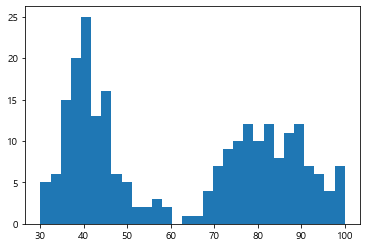

In [47]:
# scaling 전의 histogram
plt.hist(gsmerge_1d.iloc[:,2], bins=30)
plt.show()

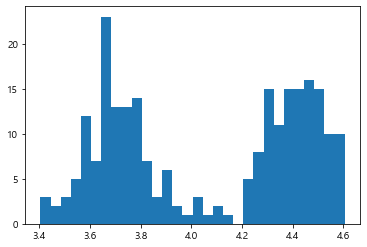

In [48]:
# log scaling 후의 histogram
plt.hist(gsmerge_1d_log_scaled.iloc[:,2],bins=30)
plt.show()

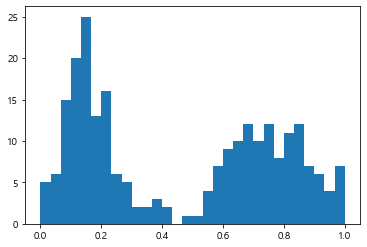

In [50]:
# minmax scaling 후의 histogram
plt.hist(gsmerge_1d_scaled.iloc[:,2],bins=30)
plt.show()

In [53]:
# 업종 식사의 비율과 검색어 비율과의 관계 (log scaled)
lm_log= LinearRegression()
lm_log.fit(np.array(gsmerge_1d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_1d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log1= lm_log.predict(np.array(gsmerge_1d_log_scaled.iloc[:,1]).reshape(-1,1))
print("식사 업종의 Rsquare:",r2_score(np.array(gsmerge_1d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log1))

lm_log2= LinearRegression()
lm_log2.fit(np.array(gsmerge_2d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log2= lm_log2.predict(np.array(gsmerge_2d_log_scaled.iloc[:,1]).reshape(-1,1))
print("간식 업종의 Rsquare:",r2_score(np.array(gsmerge_2d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log2))

lm_log3= LinearRegression()
lm_log3.fit(np.array(gsmerge_3d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_3d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log3= lm_log3.predict(np.array(gsmerge_3d_log_scaled.iloc[:,1]).reshape(-1,1))
print("마실거리 업종의 Rsquare:",r2_score(np.array(gsmerge_3d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log3))

lm_log4= LinearRegression()
lm_log4.fit(np.array(gsmerge_4d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_4d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log4= lm_log4.predict(np.array(gsmerge_4d_log_scaled.iloc[:,1]).reshape(-1,1))
print("홈&리빙 업종의 Rsquare:",r2_score(np.array(gsmerge_4d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log4))

lm_log5= LinearRegression()
lm_log5.fit(np.array(gsmerge_5d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_5d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log5= lm_log5.predict(np.array(gsmerge_5d_log_scaled.iloc[:,1]).reshape(-1,1))
print("헬스&뷰티 업종의 Rsquare:",r2_score(np.array(gsmerge_5d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log5))

lm_log6= LinearRegression()
lm_log6.fit(np.array(gsmerge_6d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_6d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log6= lm_log6.predict(np.array(gsmerge_6d_log_scaled.iloc[:,1]).reshape(-1,1))
print("취미&여가활동 업종의 Rsquare:",r2_score(np.array(gsmerge_6d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log6))

lm_log7= LinearRegression()
lm_log7.fit(np.array(gsmerge_7d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_7d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log7= lm_log7.predict(np.array(gsmerge_7d_log_scaled.iloc[:,1]).reshape(-1,1))
print("사회활동 업종의 Rsquare:",r2_score(np.array(gsmerge_7d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log7))

lm_log8= LinearRegression()
lm_log8.fit(np.array(gsmerge_8d_log_scaled.iloc[:,1]).reshape(-1,1), np.array(gsmerge_8d_log_scaled.iloc[:,2]).reshape(-1,1))
predY_log8= lm_log8.predict(np.array(gsmerge_8d_log_scaled.iloc[:,1]).reshape(-1,1))
print("임신/육아 업종의 Rsquare:",r2_score(np.array(gsmerge_8d_log_scaled.iloc[:,2]).reshape(-1,1), predY_log8))

식사 업종의 Rsquare: 0.14808930034619272
간식 업종의 Rsquare: 0.05264707179890704
마실거리 업종의 Rsquare: 0.0026748896206043593
홈&리빙 업종의 Rsquare: 0.3358332084322846
헬스&뷰티 업종의 Rsquare: 0.041629417610143715
취미&여가활동 업종의 Rsquare: 0.028760741671267742
사회활동 업종의 Rsquare: 0.07951160584099859
임신/육아 업종의 Rsquare: 0.0051732097836615365


In [73]:
print("업종 식사 상관관계: ",gsmerge_1d.corr().iloc[0,1])
print("업종 간식 상관관계: ",gsmerge_2d.corr().iloc[0,1])
print("업종 마실거리 상관관계: ",gsmerge_3d.corr().iloc[0,1])
print("업종 홈&리빙 상관관계: ",gsmerge_4d.corr().iloc[0,1])
print("업종 헬스&뷰티 상관관계: ",gsmerge_5d.corr().iloc[0,1])
print("업종 취미&여가활동 상관관계: ",gsmerge_6d.corr().iloc[0,1])
print("업종 사회활동 상관관계: ",gsmerge_7d.corr().iloc[0,1])
print("업종 임신/육아 상관관계: ",gsmerge_8d.corr().iloc[0,1])

업종 식사 상관관계:  0.36981978730867976
업종 간식 상관관계:  0.30136268477805306
업종 마실거리 상관관계:  -0.06377006202758806
업종 홈&리빙 상관관계:  0.5681096087629176
업종 헬스&뷰티 상관관계:  0.3150799650476471
업종 취미&여가활동 상관관계:  0.18747888318692696
업종 사회활동 상관관계:  -0.26897343035013466
업종 임신/육아 상관관계:  -0.10286267423347994


# R-square 나아지지 않음.

# 연별로 쪼개서 다시보기.
# scatterplot 그 자체를 보기